# Chocolate Sales (from Kaggle.com)

Date – Transaction date (format: YYYY-MM-DD)

Product – Full product name (e.g., "50% Dark Bites", "Smooth Silky Caramel", "White Chocolate Eclairs")

Amount – Sales amount in USD for the transaction ($)

Boxes Shipped – Quantity of boxes sold in the transaction

Country – Customer/sales country (e.g., Australia, UK, India, USA)

Sales Person – Name of the responsible sales representative (e.g., Mallorie Waber, Dennison Cross, Andria Kimpto)

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [52]:
df = pd.read_csv('Chocolate Sales.csv')

In [53]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184


In [54]:
df.describe(include='all')

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
count,3282,3282,3282,3282,3282,3282.000000
unique,25,6,22,504,3013,NaN
top,Kelci Walkden,Australia,Eclairs,13/01/2024,"$2,317.00",NaN
freq,162,615,180,16,5,NaN
mean,NaN,NaN,NaN,NaN,NaN,164.666971
std,NaN,NaN,NaN,NaN,NaN,124.024736
min,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,71.000000
50%,NaN,NaN,NaN,NaN,NaN,137.000000
75%,NaN,NaN,NaN,NaN,NaN,232.000000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   3282 non-null   object
 1   Country        3282 non-null   object
 2   Product        3282 non-null   object
 3   Date           3282 non-null   object
 4   Amount         3282 non-null   object
 5   Boxes Shipped  3282 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 154.0+ KB


In [109]:
df.isna().sum()

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

## Cleaning Data

In [56]:
df['Sales Person'] = df['Sales Person'].astype('category')
df['Country'] = df['Country'].astype('category')
df['Product'] = df['Product'].astype('category')
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Amount'] = df['Amount'].replace(r'[$,\s]', '', regex=True)
df['Amount'] = pd.to_numeric(df['Amount'])

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   3282 non-null   category      
 1   Country        3282 non-null   category      
 2   Product        3282 non-null   category      
 3   Date           3282 non-null   datetime64[ns]
 4   Amount         3282 non-null   float64       
 5   Boxes Shipped  3282 non-null   int64         
dtypes: category(3), datetime64[ns](1), float64(1), int64(1)
memory usage: 88.3 KB


In [58]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184


## EDA

In [59]:
df['Sales Person'].value_counts()

Sales Person
Kelci Walkden          162
Brien Boise            159
Van Tuxwell            153
Beverie Moffet         150
Dennison Crosswaite    147
Oby Sorrel             147
Ches Bonnell           144
Gigi Bohling           141
Karlen McCaffrey       141
Curtice Advani         138
Marney O'Breen         135
Madelene Upcott        135
Kaine Padly            135
Roddy Speechley        129
Gunar Cockshoot        129
Jehu Rudeforth         129
Barr Faughny           129
Mallorie Waber         123
Jan Morforth           117
Andria Kimpton         117
Husein Augar           114
Dotty Strutley         108
Rafaelita Blaksland    102
Wilone O'Kielt         102
Camilla Castle          96
Name: count, dtype: int64

In [60]:
df['Country'].value_counts()

Country
Australia      615
India          552
USA            537
UK             534
Canada         525
New Zealand    519
Name: count, dtype: int64

In [61]:
df['Product'].value_counts()

Product
50% Dark Bites          180
Eclairs                 180
Smooth Sliky Salty      177
White Choc              174
Drinking Coco           168
Spicy Special Slims     162
Organic Choco Syrup     156
85% Dark Bars           150
Fruit & Nut Bars        150
After Nines             150
Peanut Butter Cubes     147
Milk Bars               147
99% Dark & Pure         147
Almond Choco            144
Raspberry Choco         144
Orange Choco            141
Mint Chip Choco         135
Manuka Honey Choco      135
Caramel Stuffed Bars    129
70% Dark Bites          126
Baker's Choco Chips     123
Choco Coated Almonds    117
Name: count, dtype: int64

<Axes: xlabel='Country', ylabel='Amount'>

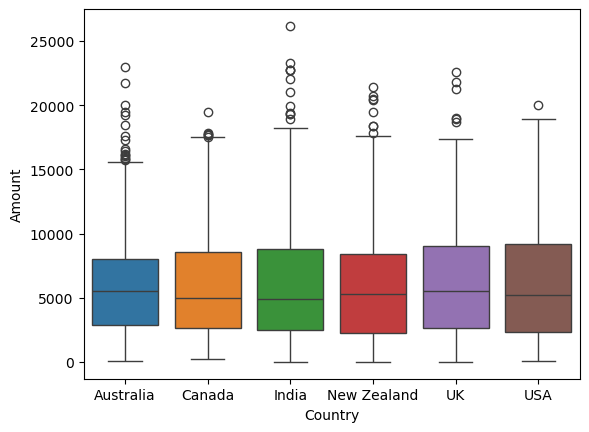

In [62]:
sns.boxplot(df, x='Country', y='Amount', hue='Country')

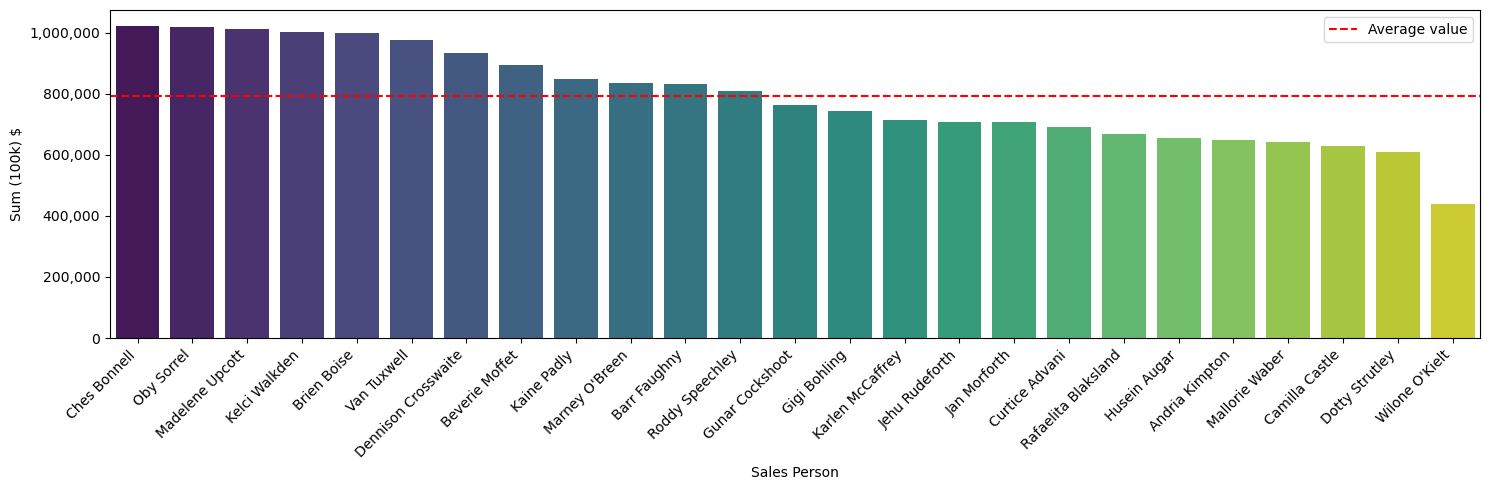

In [97]:
import matplotlib.ticker as ticker

df_grouped = (
    df
    .groupby('Sales Person', as_index=False)['Amount']
    .agg(['sum', 'count'])
    .sort_values(by='sum', ascending=False)
)


plt.figure(figsize=(15,5))
sns.barplot(df_grouped, x='Sales Person', y='sum', palette='viridis', order=df_grouped['Sales Person'])
plt.axhline(df_grouped['sum'].mean(), color='red', linestyle='--', label='Average value')

plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylabel(f'Sum (100k) $')
plt.legend()
plt.tight_layout()

Text(0, 0.5, 'Amount ($)')

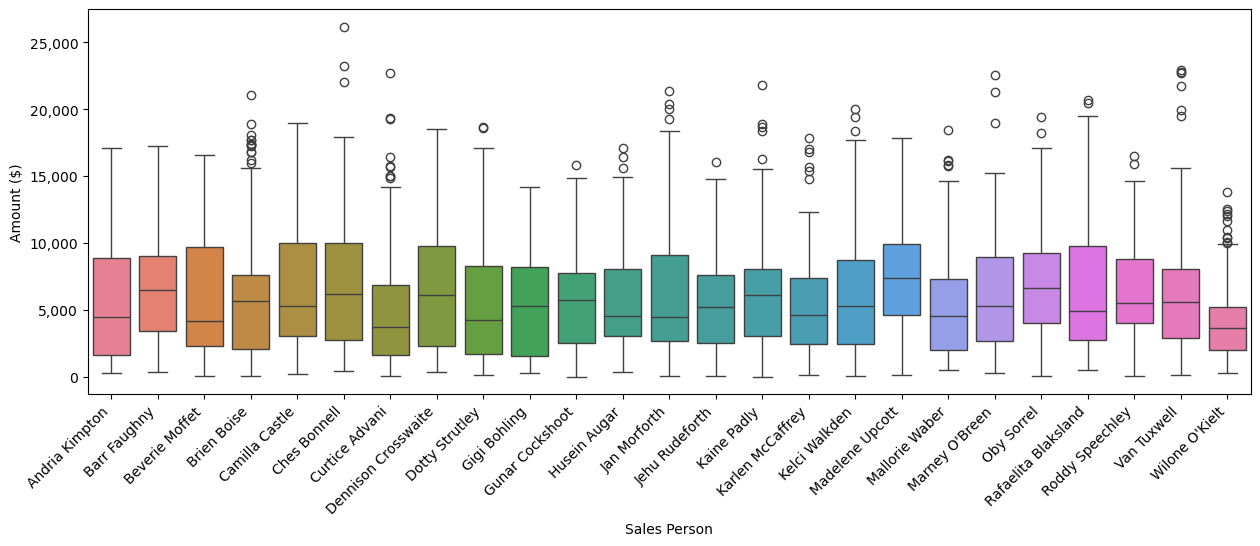

In [108]:
plt.figure(figsize=(15,5))

sns.boxplot(
    df.sort_values('Amount', ascending=False), 
    x='Sales Person', 
    y='Amount',
    hue='Sales Person'
)

plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylabel(f'Amount ($)')

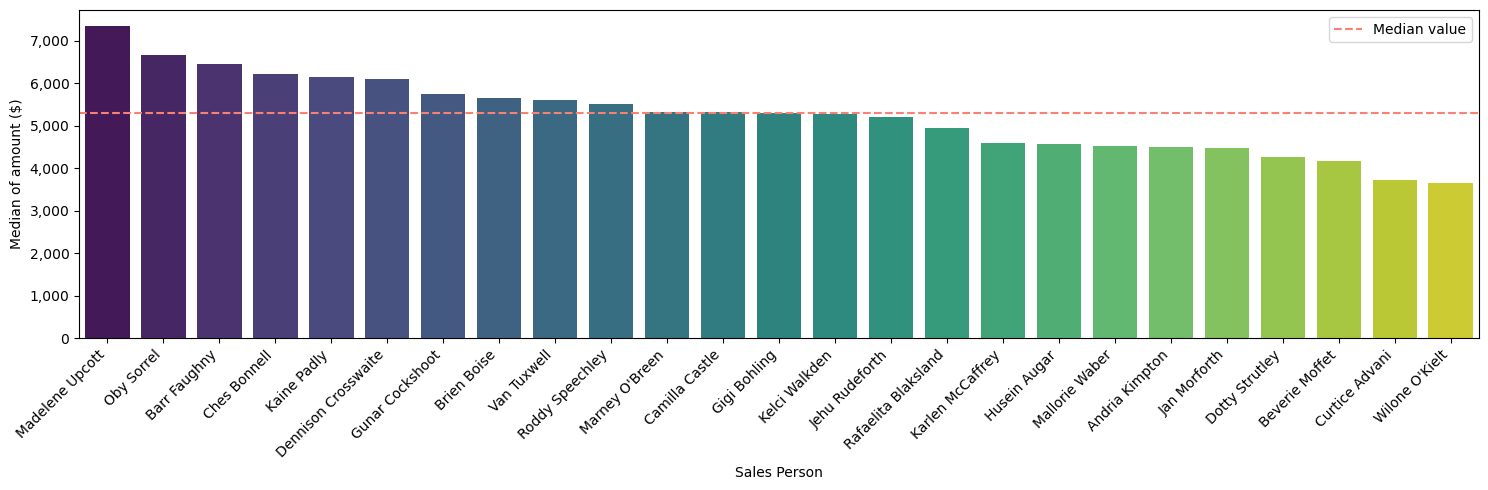

In [123]:
df_grouped = (
    df
    .groupby('Sales Person', as_index=False)['Amount']
    .agg(['median'])
    .sort_values(by='median', ascending=False)
)


plt.figure(figsize=(15,5))
sns.barplot(df_grouped, x='Sales Person', y='median', palette='viridis', order=df_grouped['Sales Person'])
plt.axhline(df_grouped['median'].median(), color='salmon', linestyle='--', label='Median value')

plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylabel(f'Median of amount ($)')
plt.legend()
plt.tight_layout()

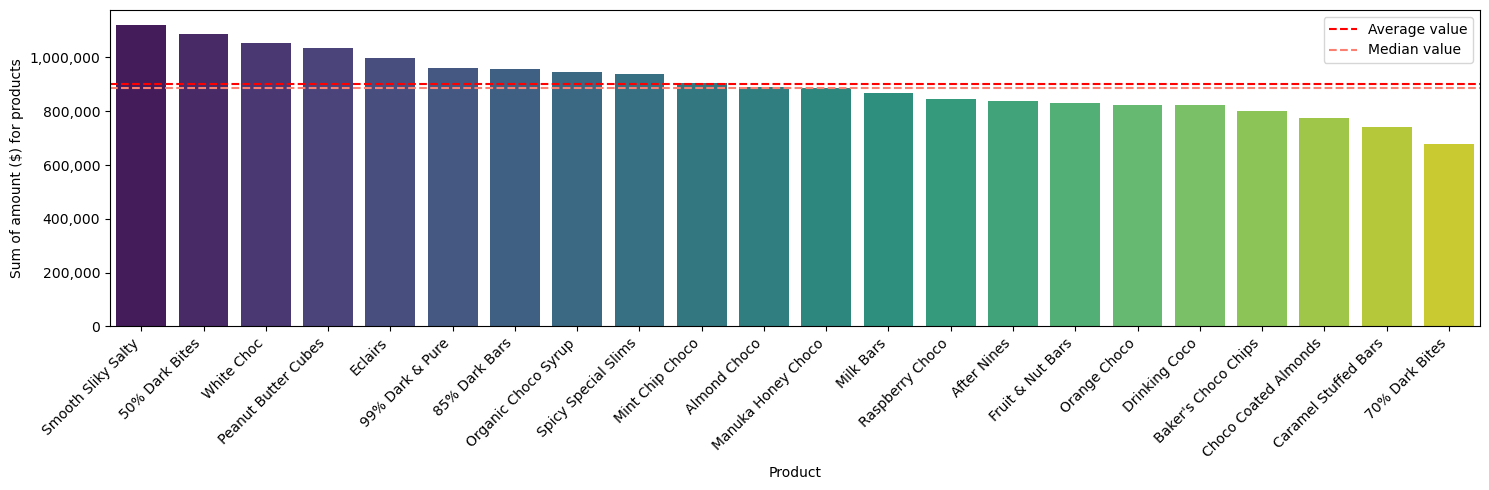

In [124]:
df_grouped = (
    df
    .groupby('Product', as_index=False)['Amount']
    .agg(['sum'])
    .sort_values(by='sum', ascending=False)
)


plt.figure(figsize=(15,5))
sns.barplot(df_grouped, x='Product', y='sum', palette='viridis', order=df_grouped['Product'])
plt.axhline(df_grouped['sum'].mean(), color='red', linestyle='--', label='Average value')
plt.axhline(df_grouped['sum'].median(), color='salmon', linestyle='--', label='Median value')

plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylabel(f'Sum of amount ($) for products')
plt.legend()
plt.tight_layout()

In [126]:
df[df['Product'] == 'White Choc']

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
28,Dennison Crosswaite,New Zealand,White Choc,2022-07-05,9492.00,151
72,Jehu Rudeforth,New Zealand,White Choc,2022-03-11,2800.00,241
79,Camilla Castle,USA,White Choc,2022-08-18,9681.00,24
132,Beverie Moffet,New Zealand,White Choc,2022-03-24,7126.00,7
169,Ches Bonnell,Australia,White Choc,2022-03-02,1043.00,202
...,...,...,...,...,...,...
3201,Karlen McCaffrey,USA,White Choc,2024-08-24,5158.01,2
3253,Rafaelita Blaksland,Australia,White Choc,2024-03-21,7326.91,102
3261,Roddy Speechley,Canada,White Choc,2024-04-05,6948.79,292
3264,Dotty Strutley,Australia,White Choc,2024-07-05,6969.38,102


In [150]:
df_trends = df.groupby(['Country', 'Product'], as_index=False)['Boxes Shipped'].agg(['sum']).sort_values(by=['Country', 'sum'], ascending=False)
df_trends

,Country,Product,sum
121,USA,Fruit & Nut Bars,6276
114,USA,After Nines,5514
110,USA,50% Dark Bites,5462
113,USA,99% Dark & Pure,5404
112,USA,85% Dark Bars,4943
...,...,...,...
17,Australia,Peanut Butter Cubes,3289
11,Australia,Fruit & Nut Bars,3064
4,Australia,After Nines,2731
8,Australia,Choco Coated Almonds,2181


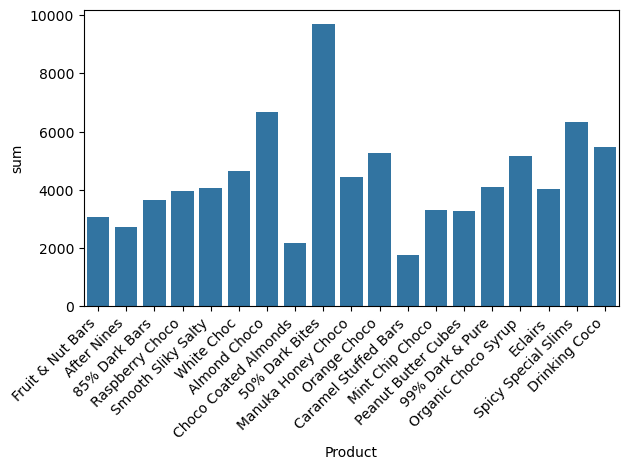

In [160]:
sns.barplot(df_trends[df_trends['Country'] == 'Australia'], x='Product', y='sum', order=df_trends['Product'].loc[df['Country'] == "Australia"])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [174]:
def unique_country_plot(df: pd.DataFrame, x: str, y: str, unique_country: str, agg_func: str = 'sum') -> None:
    df = df[df['Country'] == unique_country]
    df = (
        df
        .groupby('Product', as_index=False)[y]
        .agg(agg_func)
        .sort_values(by=y, ascending=False)
    )
    
    plt.figure(figsize=(15,5))
    sns.barplot(df, x=x, y=y, palette='viridis', order=df[x])
    plt.axhline(df[y].mean(), color='red', linestyle='--', label='Average value')
    plt.axhline(df[y].median(), color='salmon', linestyle='--', label='Median value')

    plt.xticks(rotation=45, ha='right')
    # plt.ticklabel_format(style='plain', axis='y')
    # plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    # plt.ylabel(f'{y} of amount ($) for products')
    plt.title(f'Best products in {unique_country} by {y}')
    plt.legend()
    plt.tight_layout()

In [ ]:
def unique_country_plot(df: pd.DataFrame, unique_country: str, agg_func: str = 'sum') -> None:
    df_filtered = df[df['Country'] == unique_country].copy()
    metrics = ['Boxes Shipped', 'Amount']
    fig, axes = plt.subplots(2, 1, figsize=(15, 10))
    
    for i, metric in enumerate(metrics):
        df_grouped = (
            df_filtered
            .groupby('Product', as_index=False)[metric]
            .agg(agg_func)
            .sort_values(by=metric, ascending=False)
        )
        
        sns.barplot(
            data=df_grouped, 
            x='Product', 
            y=metric, 
            palette='viridis', 
            order=df_grouped['Product'],
            ax=axes[i]
        )
        
        m_mean = df_grouped[metric].mean()
        m_median = df_grouped[metric].median()
        
        axes[i].axhline(m_mean, color='red', linestyle='--', label=f'Mean: {m_mean:,.2f}')
        axes[i].axhline(m_median, color='salmon', linestyle='--', label=f'Median: {m_median:,.2f}')
        
        axes[i].set_title(f'{agg_func.capitalize()} of {metric} in {unique_country}', fontsize=14)
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].legend()

    plt.tight_layout()
    plt.show()


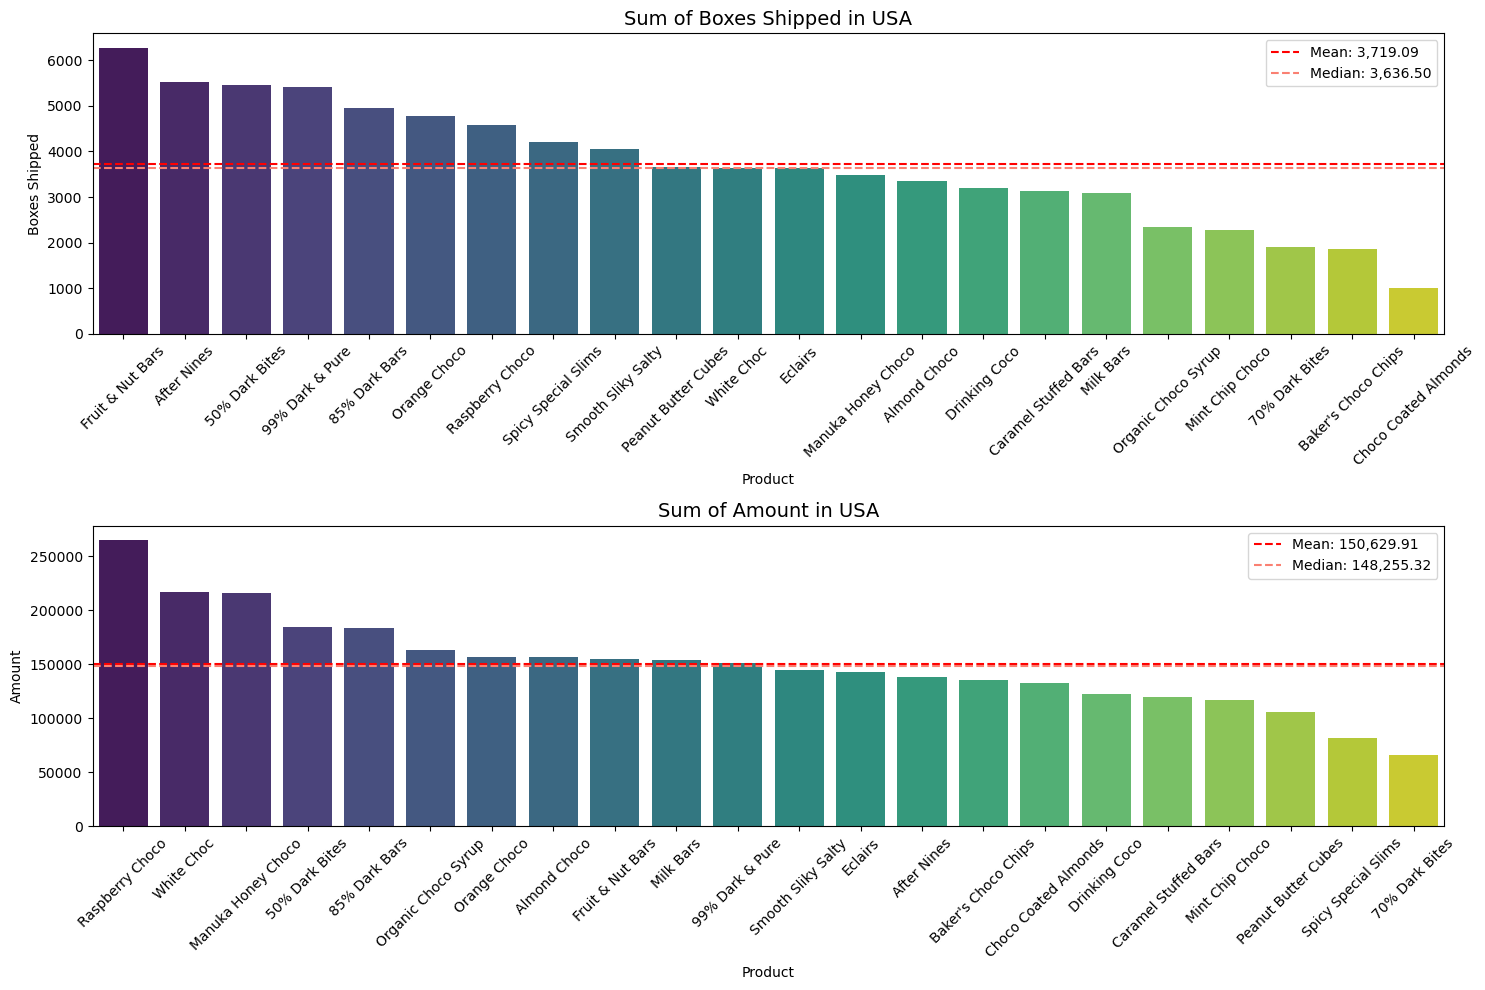

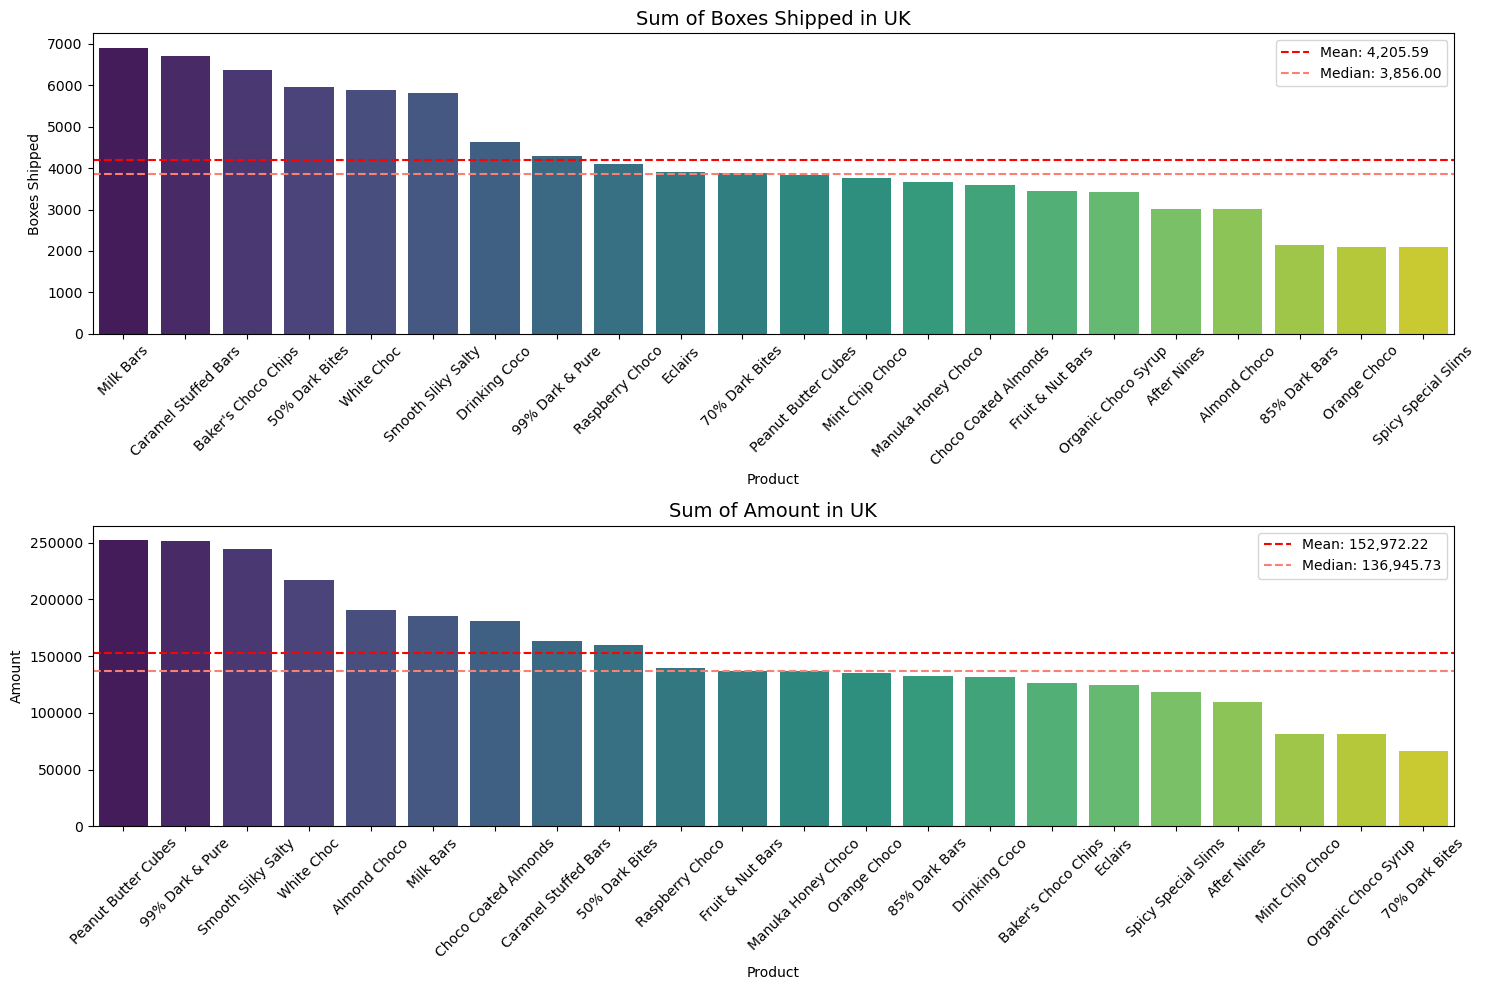

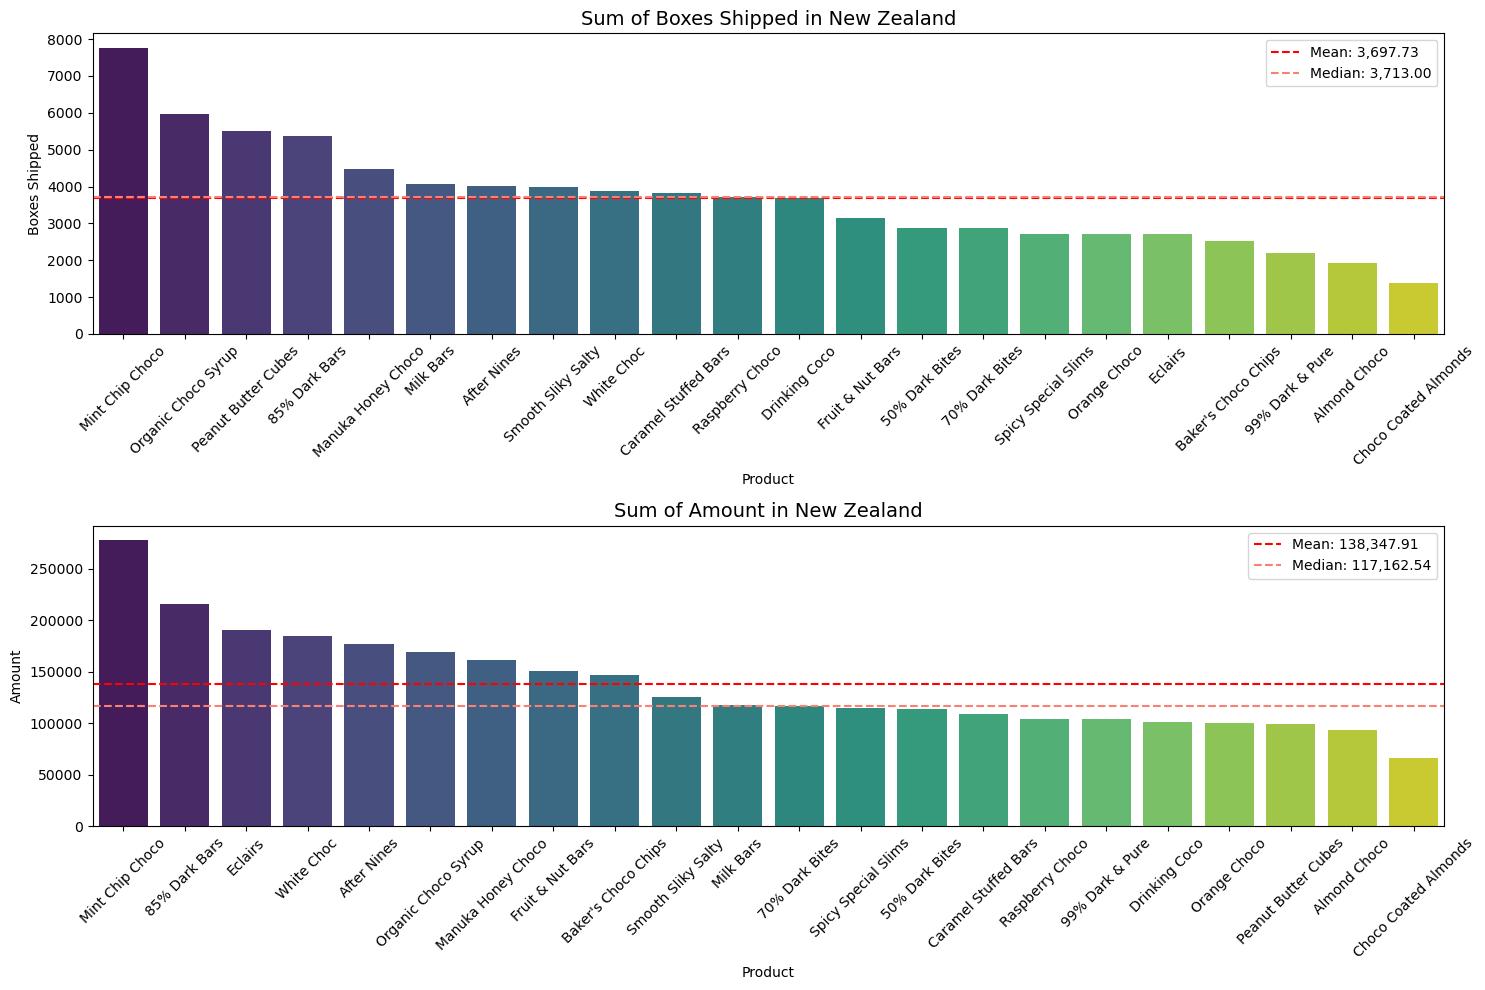

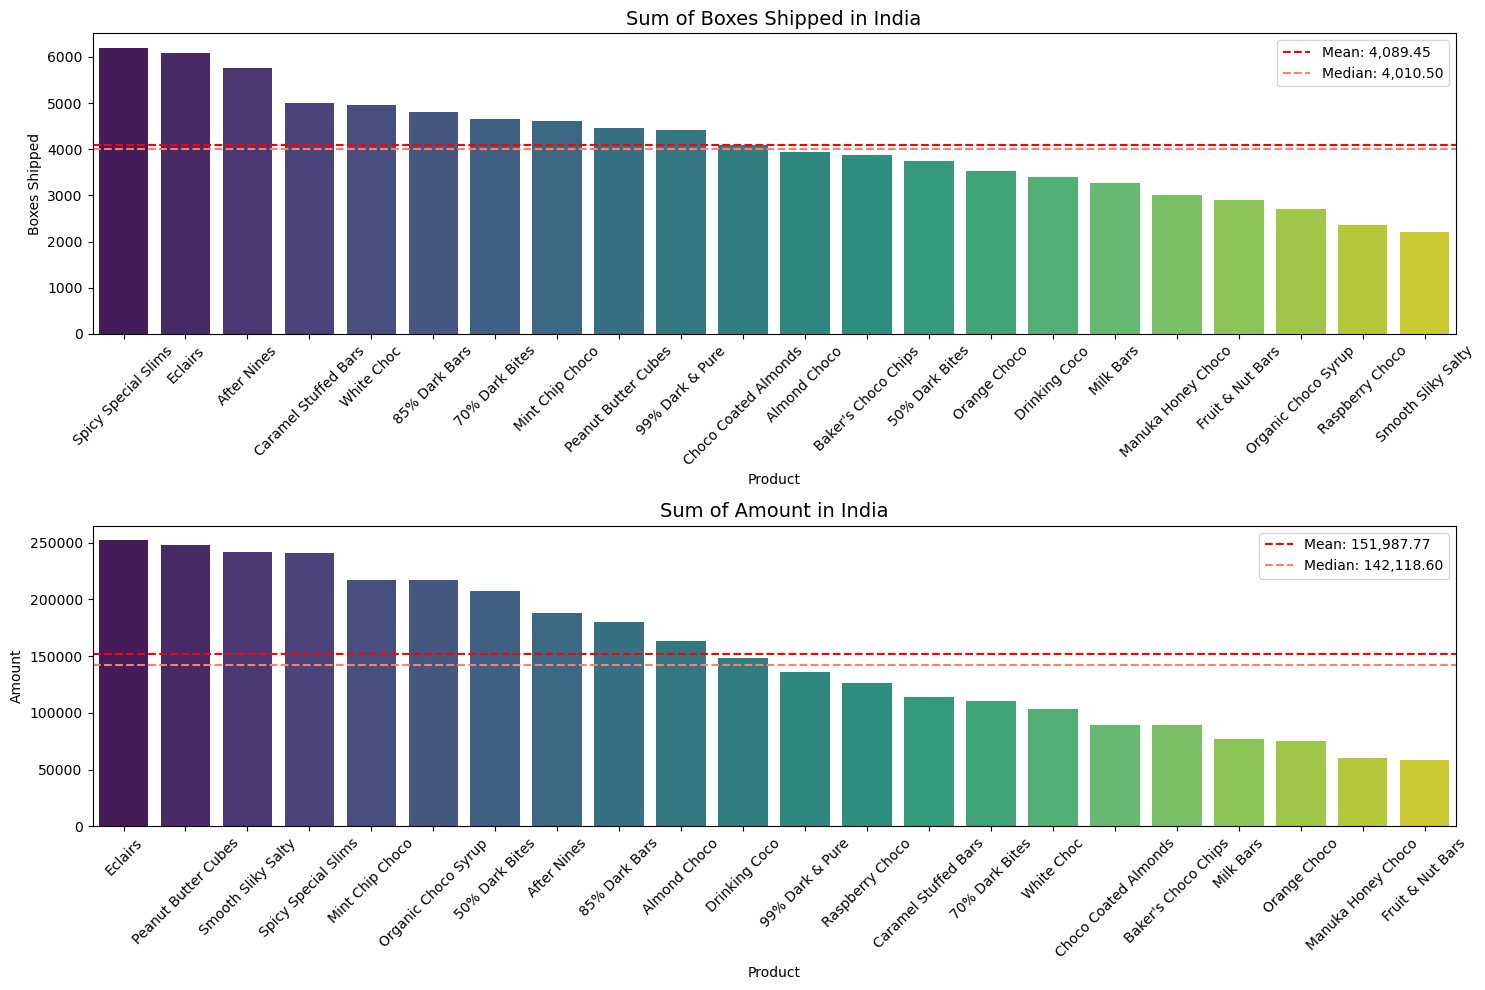

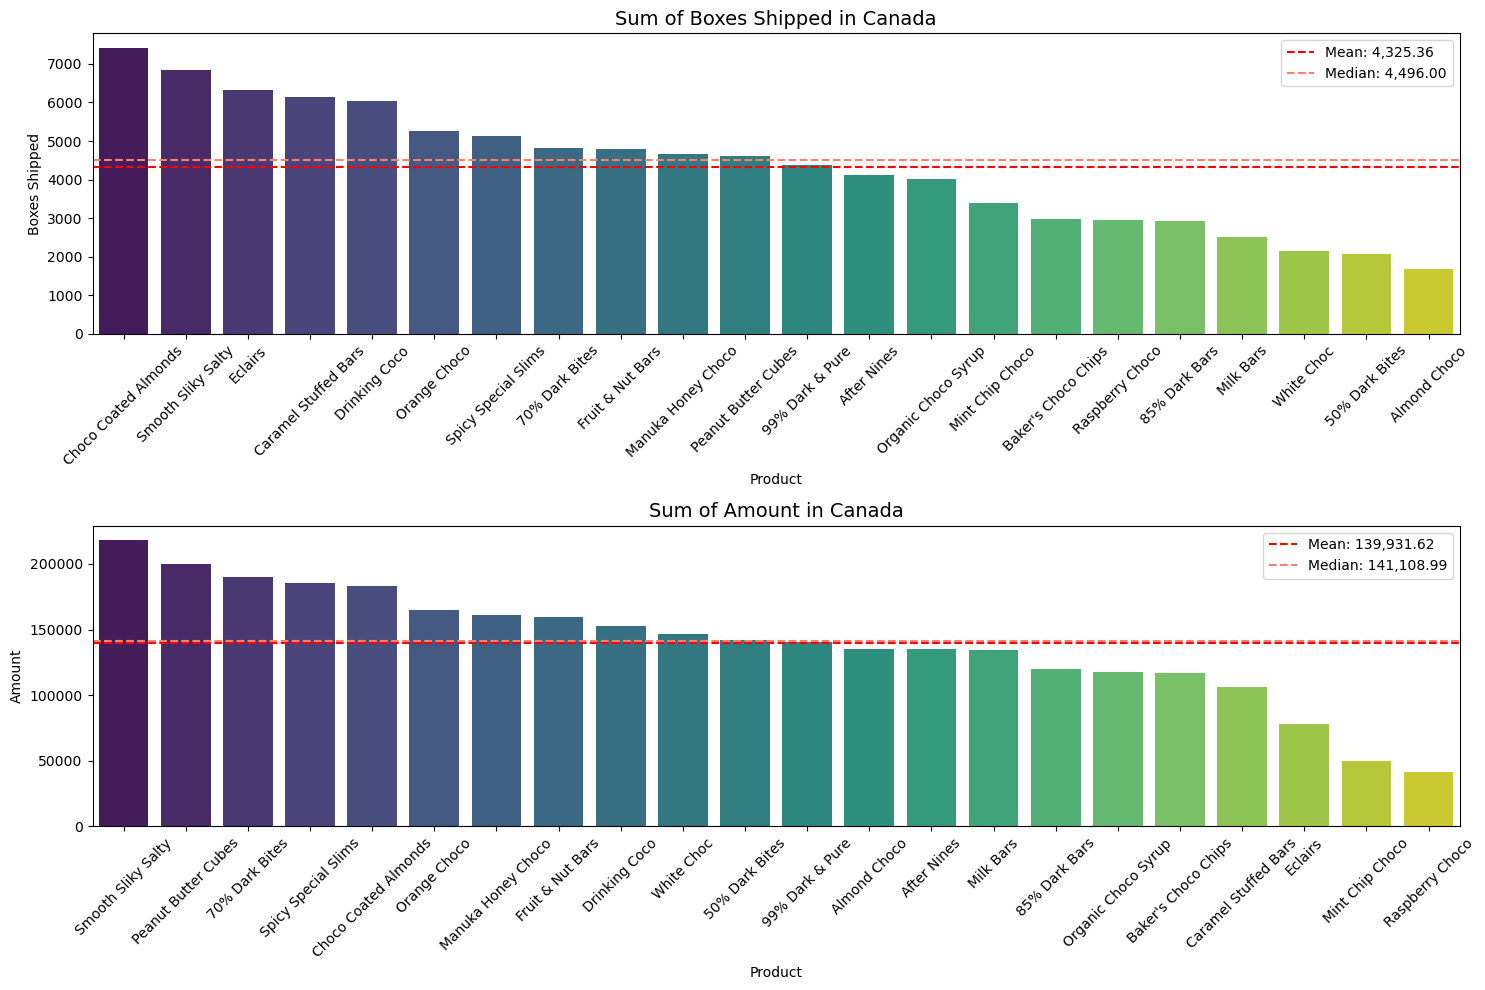

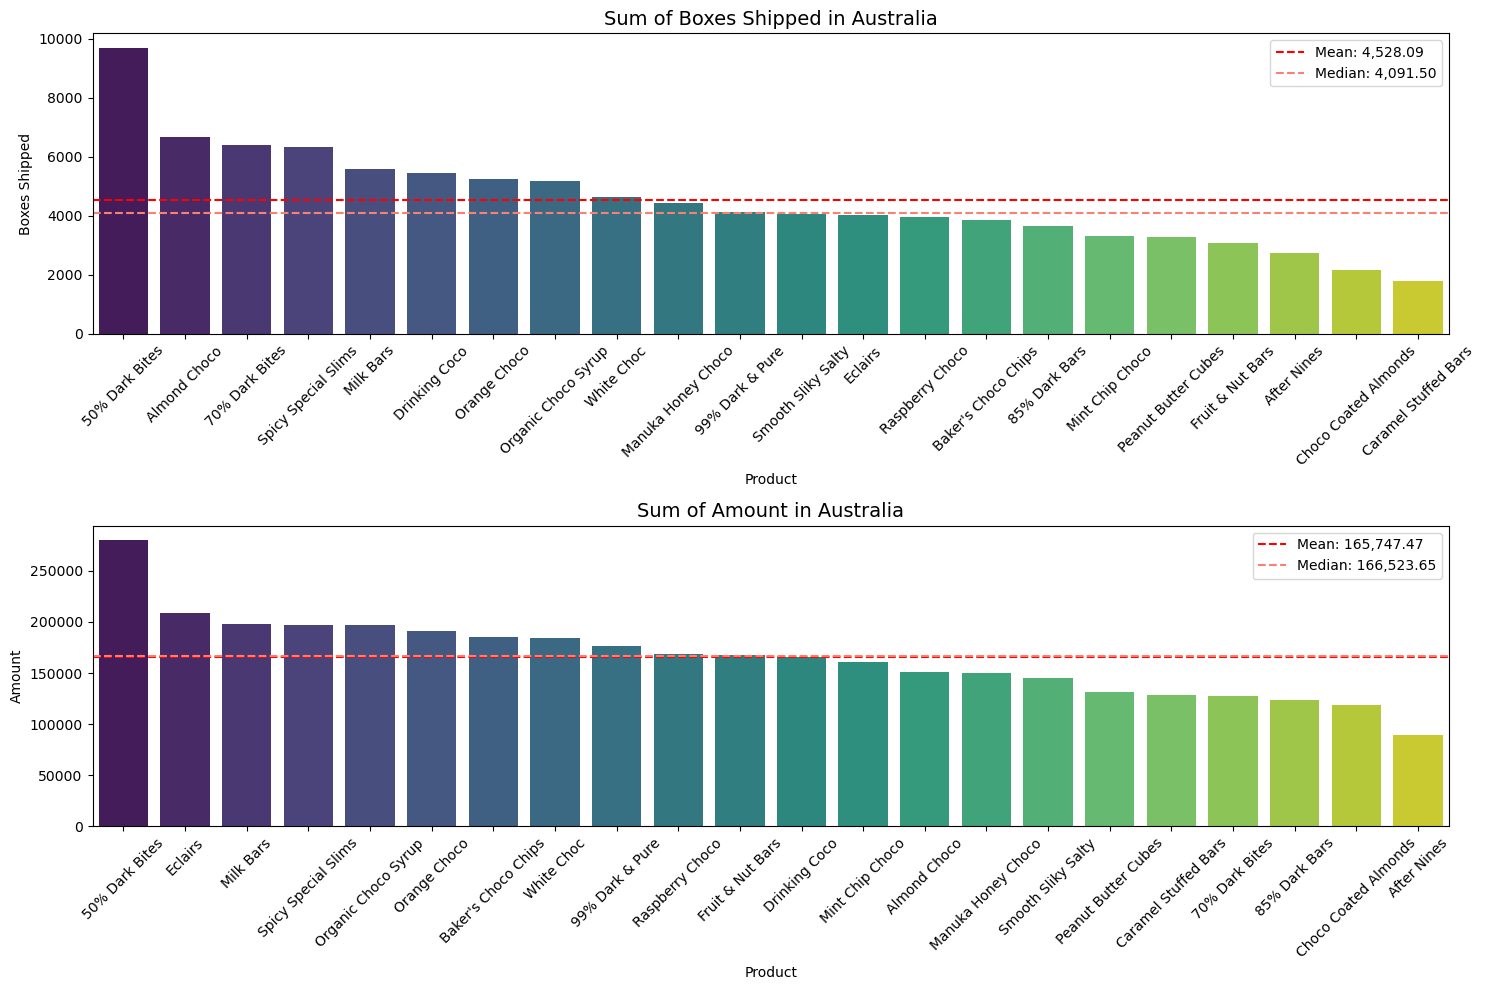

In [186]:
for country in df_trends['Country'].unique().to_list():
    unique_country_plot(
        df,
        unique_country=country
    )

In [193]:
df_ts = df.copy().sort_values('Date').set_index('Date')
df_ts.head()

,Sales Person,Country,Product,Amount,Boxes Shipped
Date,,,,,
2022-01-03,Dotty Strutley,USA,Raspberry Choco,3437.0,46
2022-01-03,Marney O'Breen,Australia,Smooth Sliky Salty,3745.0,170
2022-01-03,Andria Kimpton,Canada,Caramel Stuffed Bars,7154.0,348
2022-01-03,Dotty Strutley,UK,99% Dark & Pure,9310.0,282
2022-01-03,Camilla Castle,UK,White Choc,9982.0,187


In [203]:
df['Amount per Box'] = df['Amount'] / df['Boxes Shipped']

In [212]:
df.groupby(['Product'], as_index=False)['Amount per Box'].agg({'Amount per Box mean': np.mean}).sort_values('Amount per Box mean', ascending=False)

,Product,Amount per Box mean
21,White Choc,246.487640
14,Mint Chip Choco,169.830736
3,99% Dark & Pure,155.224428
8,Choco Coated Almonds,127.188276
15,Orange Choco,126.969960
20,Spicy Special Slims,126.797867
10,Eclairs,124.347012
0,50% Dark Bites,117.096311
11,Fruit & Nut Bars,113.930505
2,85% Dark Bars,109.348544


In [217]:
df_grouped = df.groupby(['Country', 'Product'], as_index=False)['Amount per Box'].agg({'Amount per Box mean': np.mean}).sort_values(['Country', 'Amount per Box mean'], ascending=False)

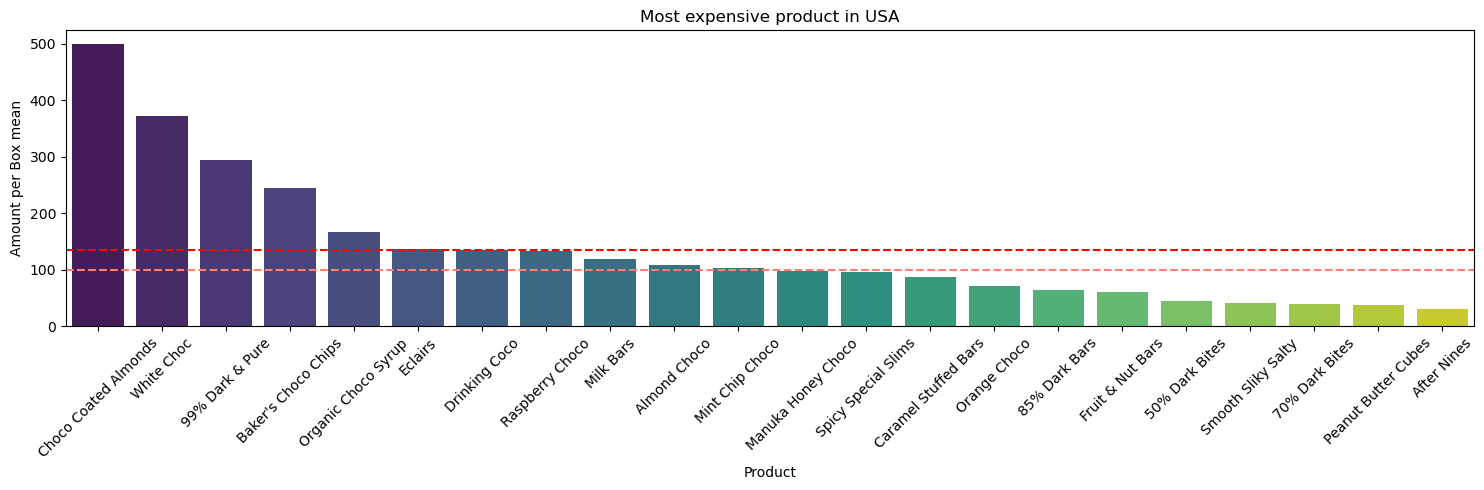

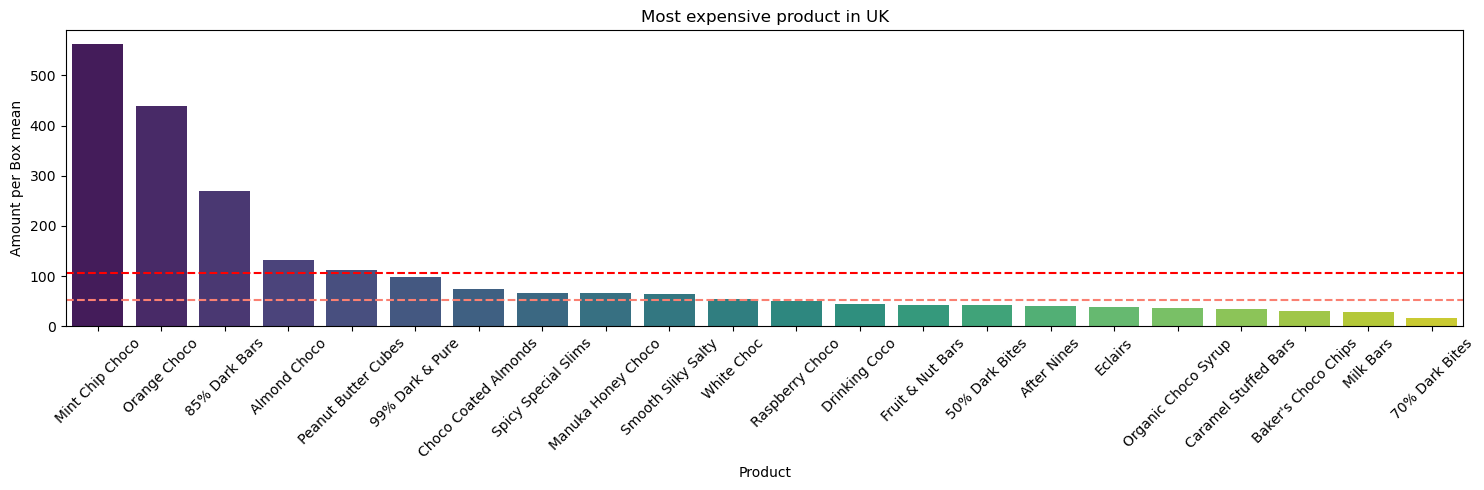

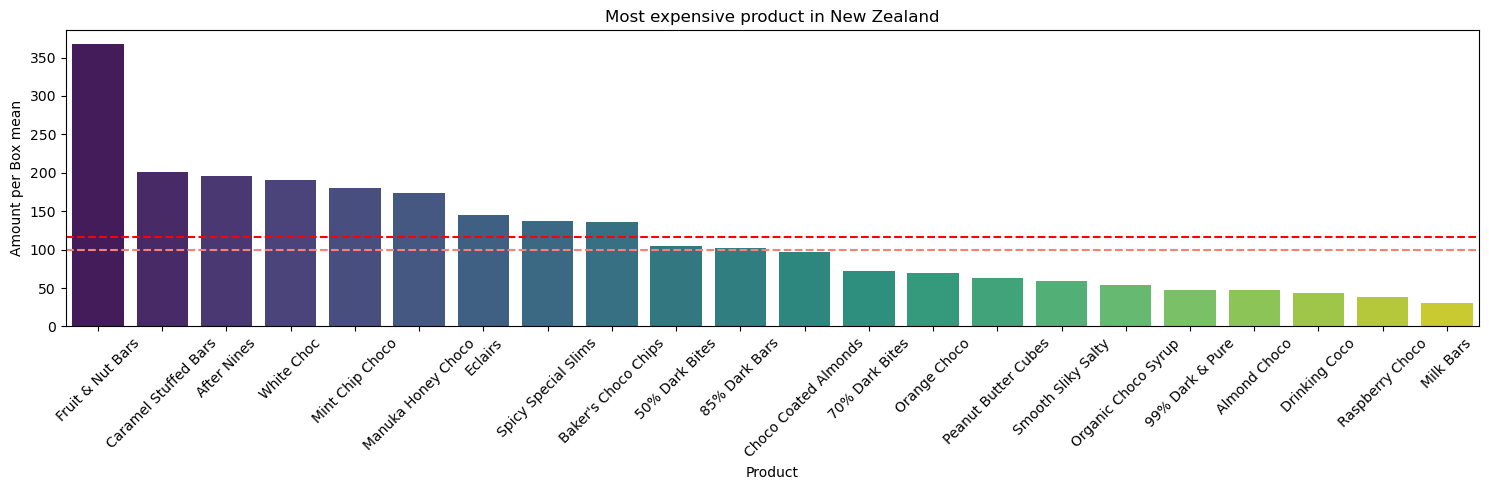

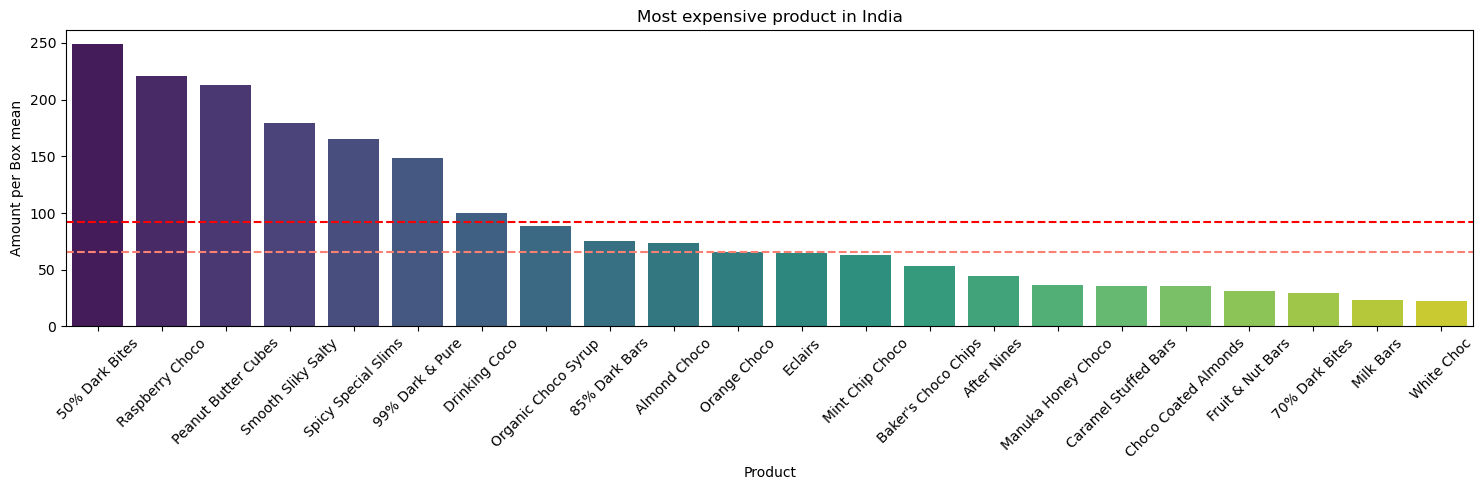

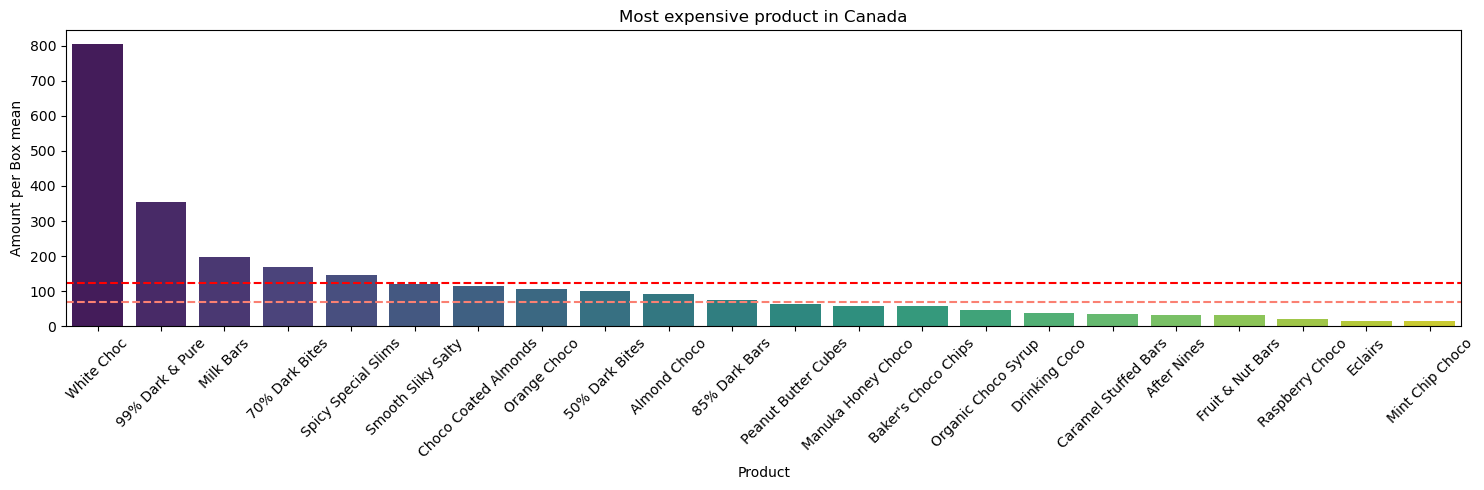

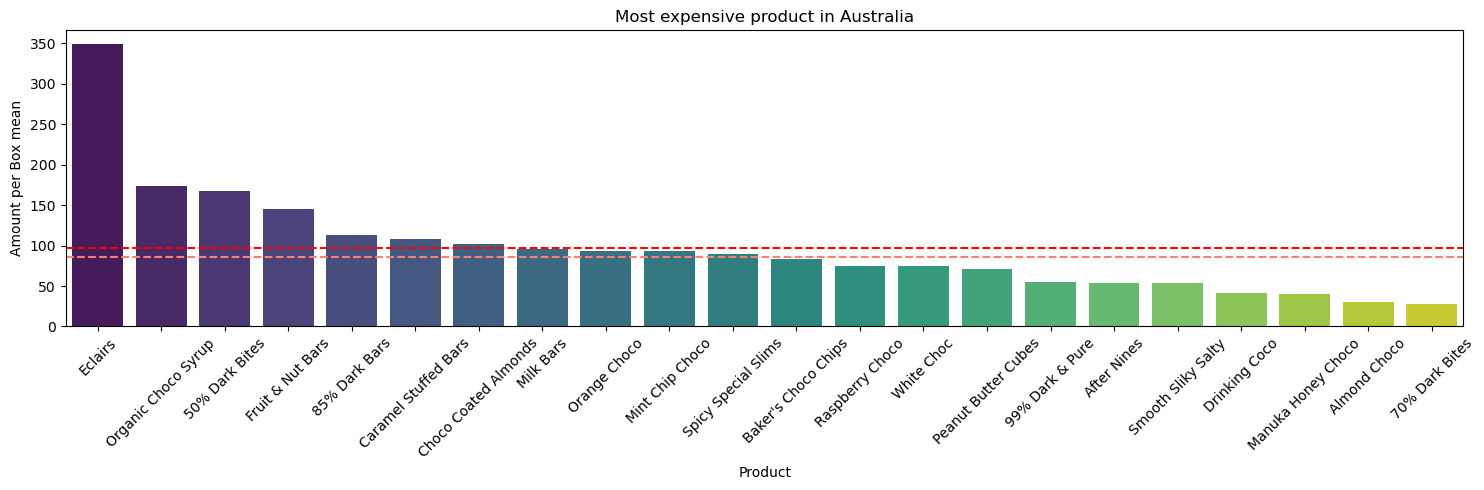

In [242]:
for country in df_grouped['Country'].unique().to_list():
    plt.figure(figsize=(15,5))
    sns.barplot(df_grouped[df_grouped['Country'] == country], x='Product', y='Amount per Box mean', order=df_grouped[df_grouped['Country'] == country]['Product'], palette='viridis')
    plt.xticks(rotation=45)
    plt.axhline(df_grouped[df_grouped['Country'] == country]['Amount per Box mean'].median(), color='salmon', linestyle='--', label='median')
    plt.axhline(df_grouped[df_grouped['Country'] == country]['Amount per Box mean'].mean(), color='red', linestyle='--', label='mean')
    plt.title(f'Most expensive product in {country}')
    plt.tight_layout()

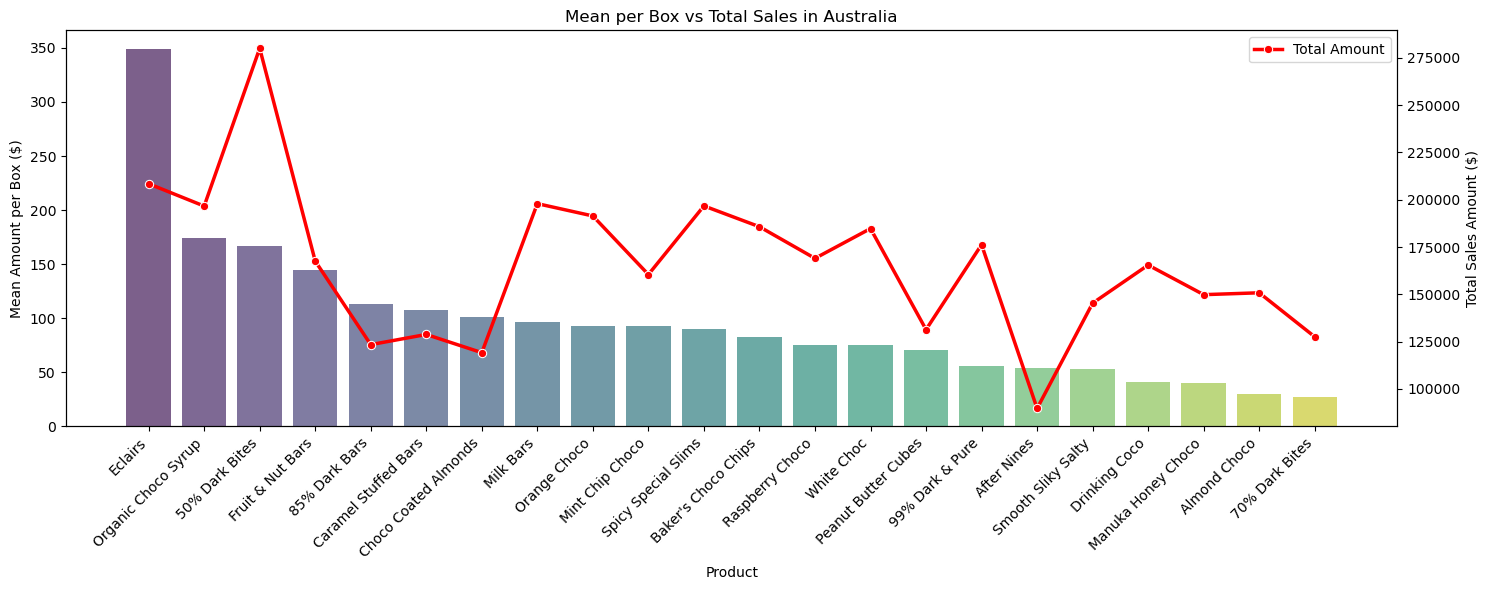

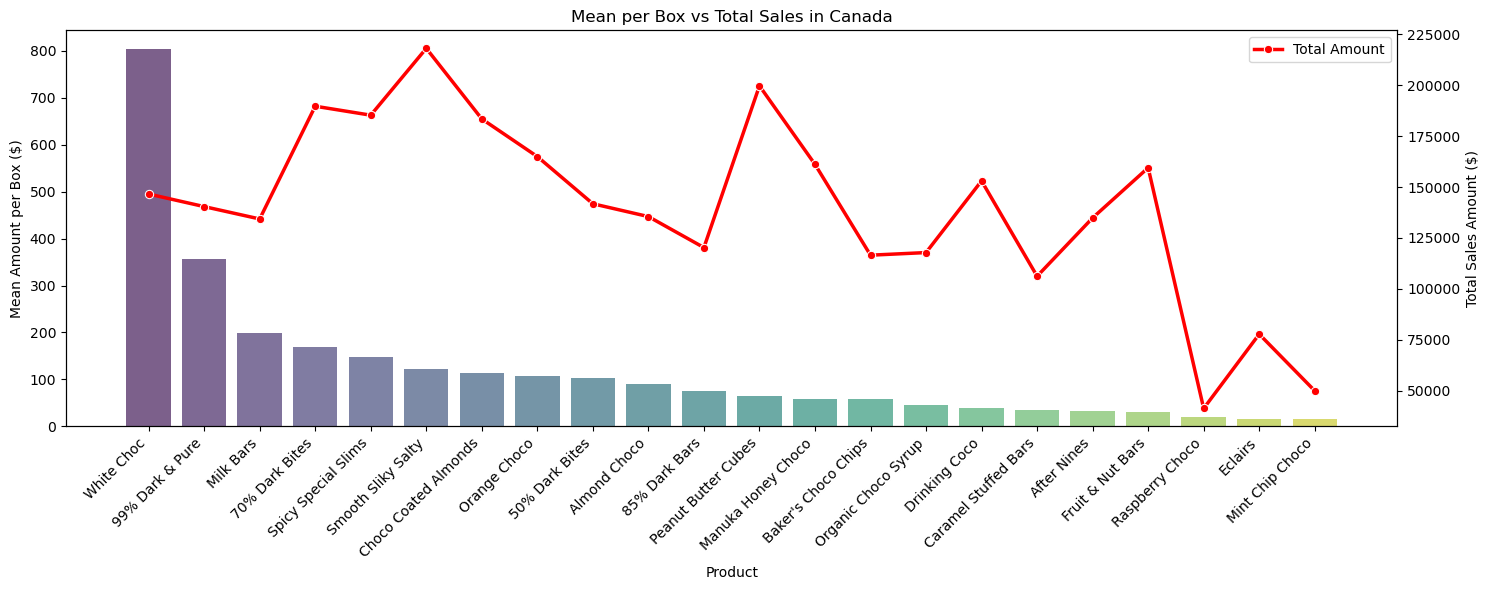

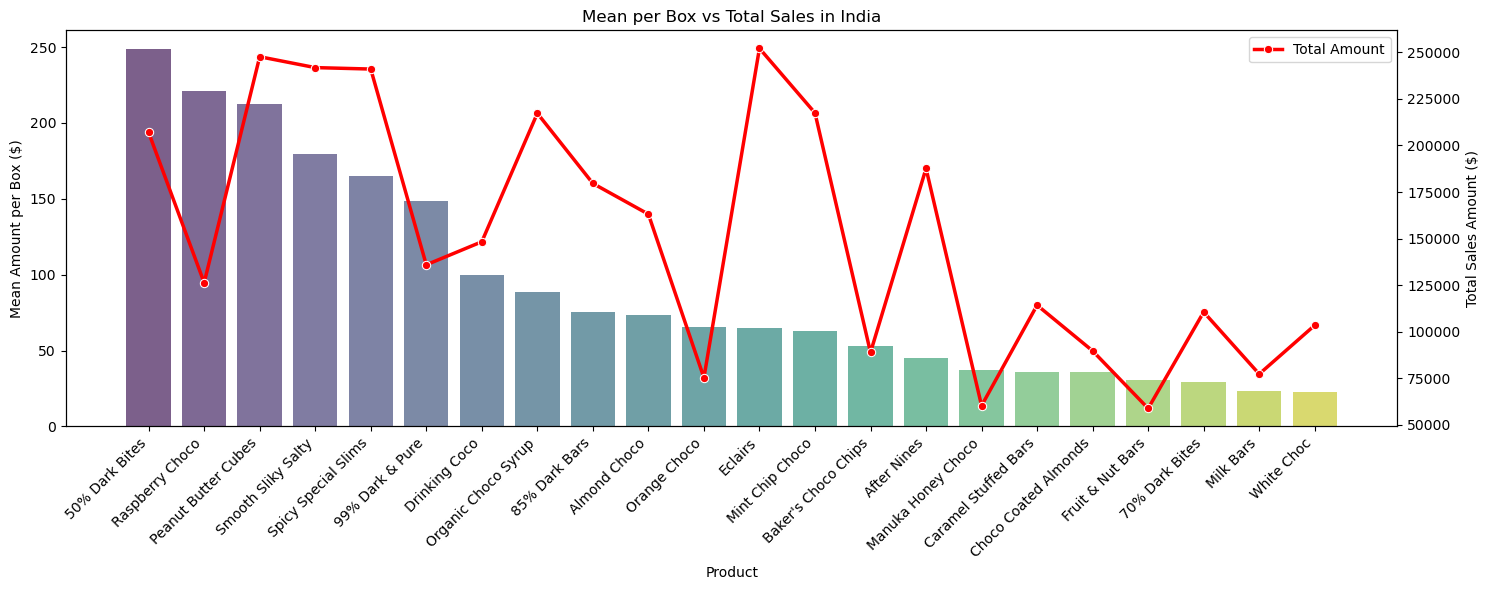

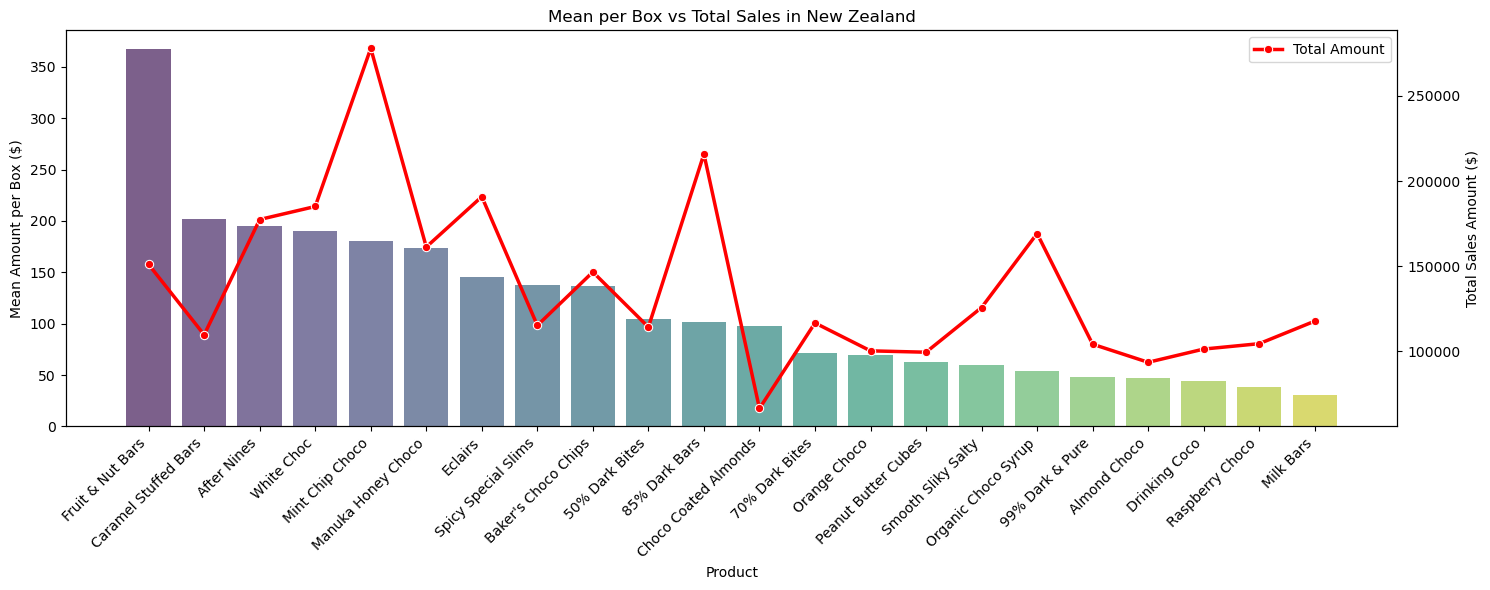

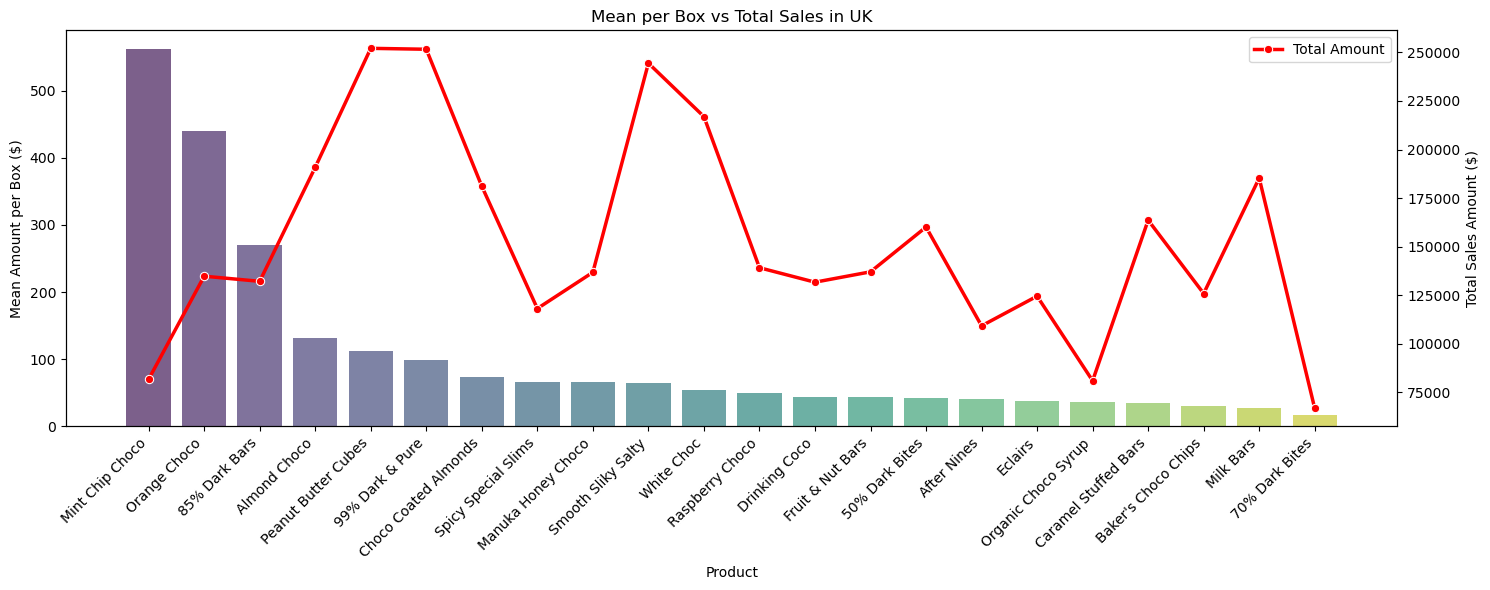

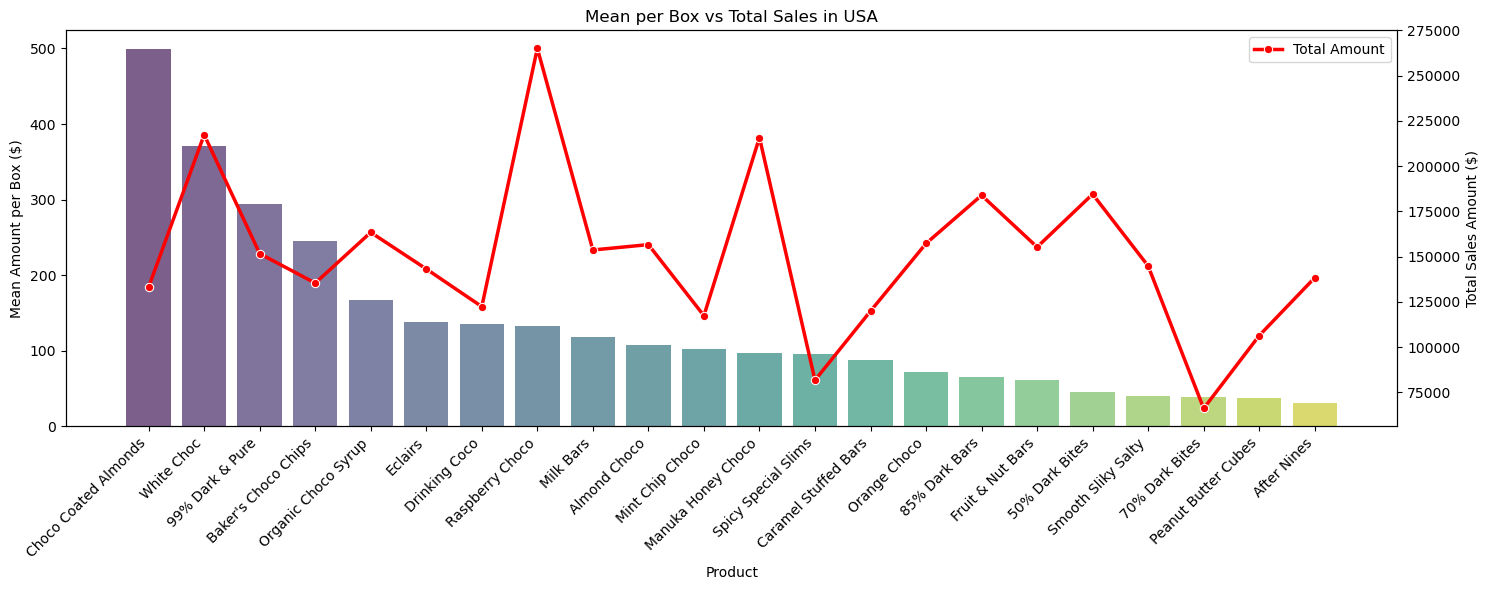

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns

df_trends = (
    df.groupby(['Country', 'Product'], as_index=False)
    .agg(
        mean_per_box=('Amount per Box', 'mean'),
        total_amount=('Amount', 'sum')
    )
    .sort_values(['Country', 'mean_per_box'], ascending=[True, False])
)

for country in df_trends['Country'].unique():
    data = df_trends[df_trends['Country'] == country]
    
    fig, ax1 = plt.subplots(figsize=(15, 6))

    sns.barplot(data=data, x='Product', y='mean_per_box', palette='viridis', 
                order=data['Product'], ax=ax1, alpha=0.7)
    ax1.set_ylabel('Mean Amount per Box ($)')
    ax1.tick_params(axis='y')

    ax2 = ax1.twinx()
    
    sns.lineplot(data=data, x='Product', y='total_amount', color='red', 
                 marker='o', sort=False, ax=ax2, linewidth=2.5, label='Total Amount')
    ax2.set_ylabel('Total Sales Amount ($)')
    ax2.tick_params(axis='y')

    plt.title(f'Mean per Box vs Total Sales in {country}')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
    
    fig.tight_layout()
    plt.show()

<Axes: xlabel='Boxes Shipped', ylabel='Amount'>

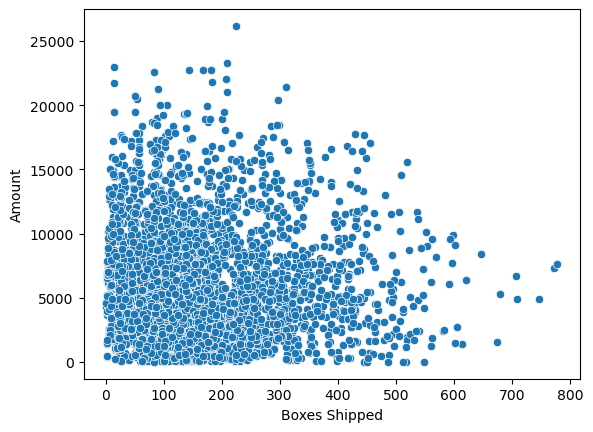

In [246]:
sns.scatterplot(df, x='Boxes Shipped', y='Amount')

<Axes: xlabel='Boxes Shipped', ylabel='Amount per Box'>

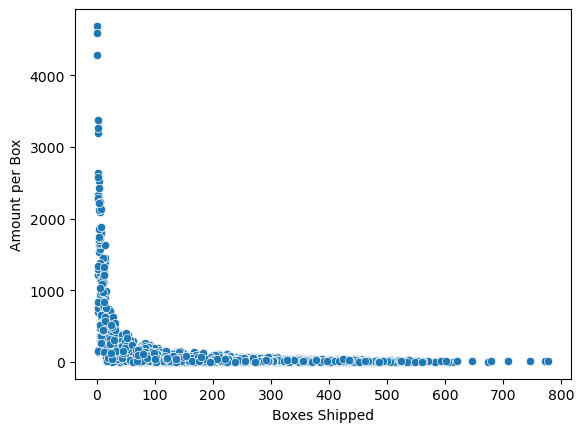

In [252]:
sns.scatterplot(df, x='Boxes Shipped', y='Amount per Box')

In [249]:
df[
    (df['Boxes Shipped'] > 600) &
    (df['Amount'] < 10000)
].sort_values(by='Amount per Box', ascending=False)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Amount per Box
2957,Karlen McCaffrey,Canada,70% Dark Bites,2024-06-24,9089.21,602,15.098355
1863,Karlen McCaffrey,Canada,70% Dark Bites,2023-06-24,8376.69,646,12.967012
3258,Oby Sorrel,Canada,Eclairs,2024-05-19,6409.31,621,10.320950
2918,Karlen McCaffrey,Australia,50% Dark Bites,2024-01-17,7642.94,778,9.823830
1824,Karlen McCaffrey,Australia,50% Dark Bites,2023-01-17,7355.77,772,9.528199
730,Karlen McCaffrey,Australia,50% Dark Bites,2022-01-17,6678.00,708,9.432203
3216,Van Tuxwell,Canada,Drinking Coco,2024-06-15,5294.88,679,7.798056
1028,Van Tuxwell,Canada,Drinking Coco,2022-06-15,4900.00,709,6.911142
2122,Van Tuxwell,Canada,Drinking Coco,2023-06-15,4919.25,746,6.594169
2227,Karlen McCaffrey,India,Manuka Honey Choco,2024-07-04,2696.10,605,4.456364


In [251]:
df[df['Sales Person'] == 'Karlen McCaffrey'].sort_values('Amount per Box')

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Amount per Box
1553,Karlen McCaffrey,USA,Drinking Coco,2023-06-29,114.82,231,0.497056
459,Karlen McCaffrey,USA,Drinking Coco,2022-06-29,112.00,223,0.502242
25,Karlen McCaffrey,India,Fruit & Nut Bars,2022-01-26,168.00,321,0.523364
2647,Karlen McCaffrey,USA,Drinking Coco,2024-06-29,132.68,243,0.546008
2213,Karlen McCaffrey,India,Fruit & Nut Bars,2024-01-26,181.31,330,0.549424
...,...,...,...,...,...,...,...
2466,Karlen McCaffrey,USA,Milk Bars,2024-01-27,5231.54,8,653.942500
1372,Karlen McCaffrey,USA,Milk Bars,2023-01-27,4764.56,7,680.651429
1013,Karlen McCaffrey,USA,White Choc,2022-08-24,4592.00,2,2296.000000
3201,Karlen McCaffrey,USA,White Choc,2024-08-24,5158.01,2,2579.005000
